Exploratory Data Analysis

In [1]:
import ast 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

#load dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Roles to Explore

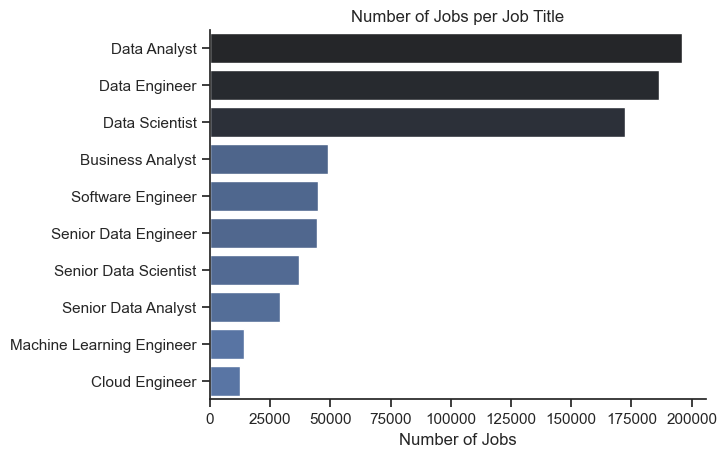

In [2]:
#job count by job title
df_counts = df['job_title_short'].value_counts().head(10).to_frame()

#plot
sns.set_theme(style='ticks')
sns.barplot(data=df_counts, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Countries to Explore

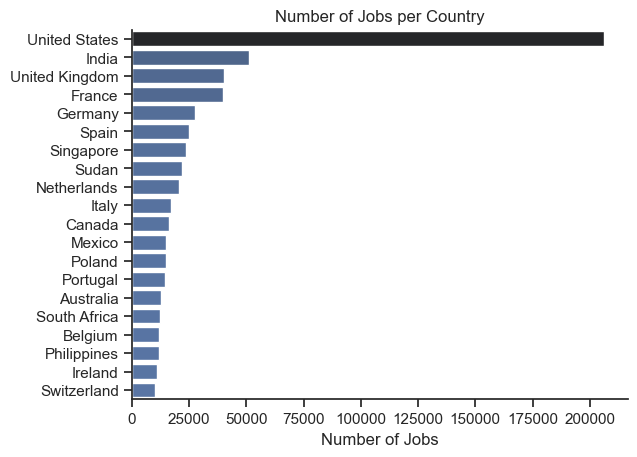

In [3]:
#job counts by countries
df_counts = df['job_country'].value_counts().head(20).to_frame()

#plot
sns.set_theme(style='ticks')
sns.barplot(data=df_counts, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Companies to Explore

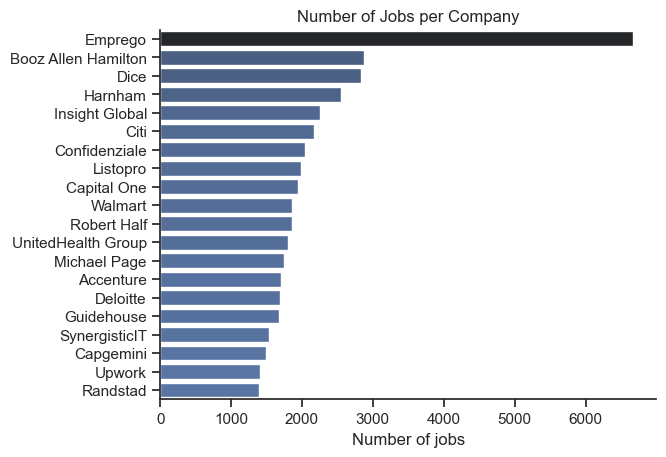

In [4]:
#job counts by company name
df_counts = df['company_name'].value_counts().to_frame().head(20)

#plot
sns.set_theme(style='ticks')
sns.barplot(data=df_counts, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of jobs')
plt.ylabel('')
plt.show()

Job Opportunities

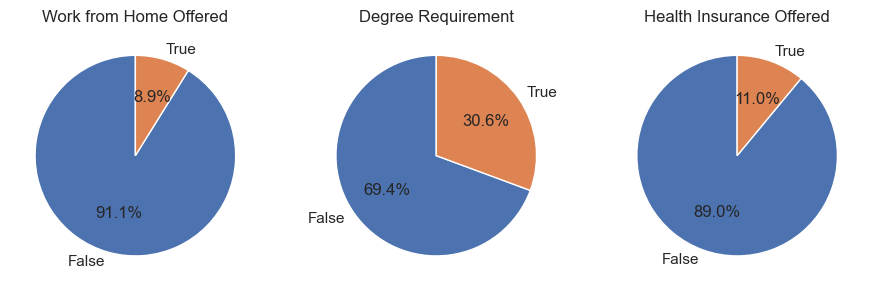

In [5]:
dict_columns = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))
for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
plt.show()

Exploratory Data Analysis for Data Analyst in TH

In [6]:
df_TH = df[df['job_country'] == 'Thailand']['job_title_short'].value_counts()
df_TH

job_title_short
Data Analyst                 1477
Data Engineer                 715
Business Analyst              543
Data Scientist                503
Software Engineer             340
Senior Data Analyst           162
Cloud Engineer                140
Machine Learning Engineer      99
Senior Data Scientist          96
Senior Data Engineer           86
Name: count, dtype: int64

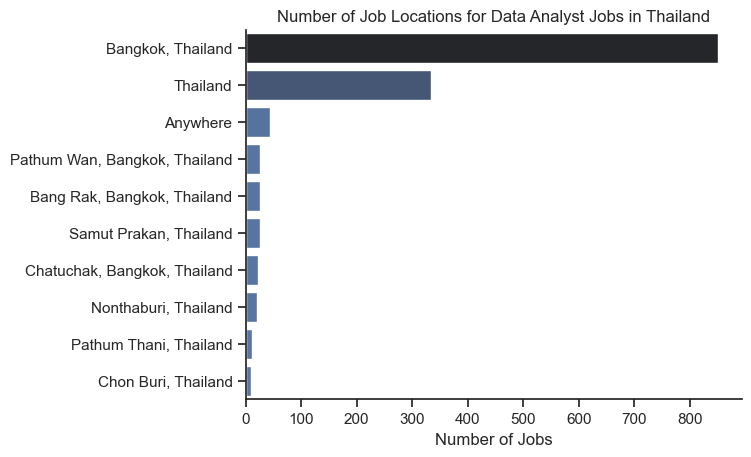

In [7]:
df_DA_TH = df[(df['job_country'] == 'Thailand') & (df['job_title_short'] == 'Data Analyst')]

#job counts per location
df_counts = df_DA_TH['job_location'].value_counts().to_frame().head(10)

#plot
sns.set_theme(style='ticks')
sns.barplot(data=df_counts, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Job Locations for Data Analyst Jobs in Thailand')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Job Opportunities

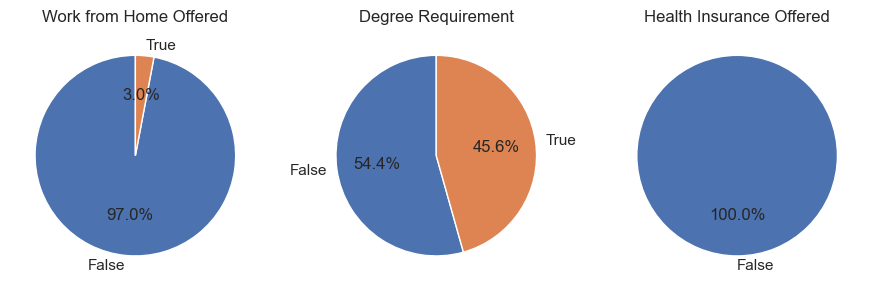

In [8]:
dict_columns = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))
for i, (column, title) in enumerate(dict_columns.items()):
    counts = df_DA_TH[column].value_counts()
    ax[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
plt.show()

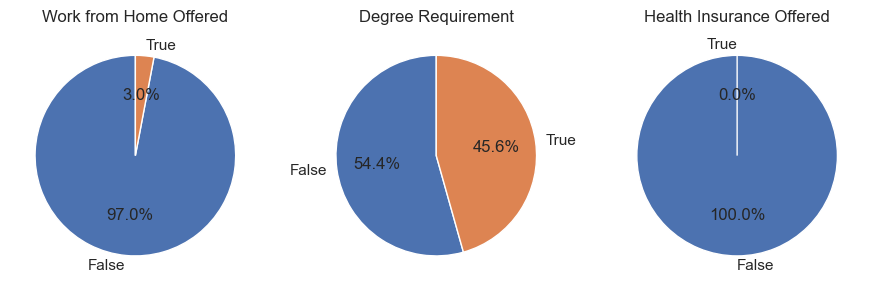

In [9]:
dict_columns = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))
for i, (column, title) in enumerate(dict_columns.items()):
    counts = df_DA_TH[column].value_counts()
    counts = counts.reindex([False, True], fill_value=0)
    ax[i].pie(counts, labels=['False','True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
plt.show()

Companies to Explore 

In [10]:
df_counts = df_DA_TH['company_name'].value_counts().to_frame().head(10)
df_counts

,count
company_name,
Agoda,59
Sertis,12
Shopee,11
Prinsiri,10
KASIKORNBANK,10
TELUS International AI Data Solutions,10
บริษัท บิ๊กซี ซูเปอร์เซ็นเตอร์ จำกัด (มหาชน),10
Unilever,10
Lazada,10


In [11]:
df_dg = df_DA_TH['job_no_degree_mention'].value_counts()
df_dg

job_no_degree_mention
False    803
True     674
Name: count, dtype: int64

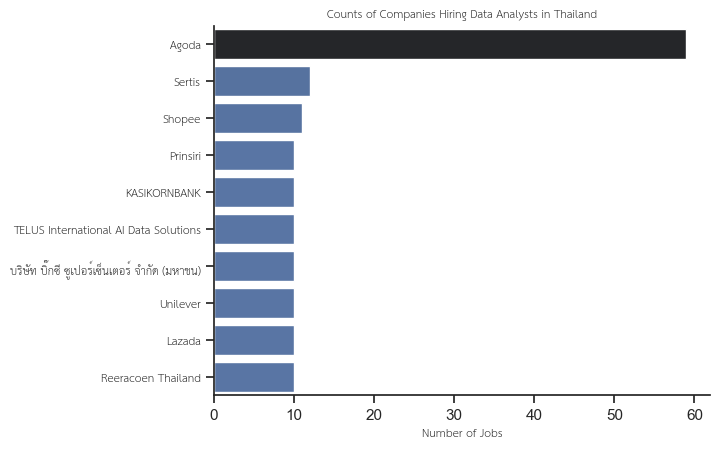

In [12]:
from matplotlib import font_manager

# Thai font
thai_font_path = r"C:\Users\crazy\AppData\Local\Microsoft\Windows\Fonts\THSarabunNew.ttf"
thai_font = font_manager.FontProperties(fname=thai_font_path)

df_counts = df_DA_TH['company_name'].value_counts().to_frame().head(10)

# plot
sns.set_theme(style='ticks')
ax = sns.barplot(data=df_counts, x='count', y='company_name', hue='count', palette='dark:b_r', dodge=False, legend=False)

for label in ax.get_yticklabels():
    label.set_fontproperties(thai_font)
    label.set_weight('bold') 

plt.title('Counts of Companies Hiring Data Analysts in Thailand', fontproperties=thai_font)
plt.xlabel('Number of Jobs', fontproperties=thai_font)
plt.ylabel('', fontproperties=thai_font)

sns.despine()
plt.show()